In [89]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [90]:
img = cv2.imread("/home/sunit.kapuria/Downloads/retina3.jpg")

In [91]:
img  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray  = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
image=img

In [92]:
ret,th=cv2.threshold(img_gray, 0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


In [93]:
# kernel = np.ones((7,7),np.uint8)
# closing = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)
# plt.imshow(closing, 'gray')

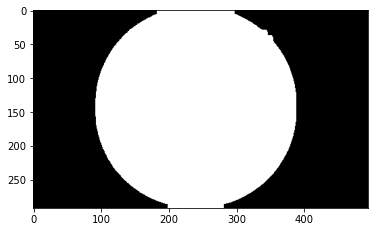

In [94]:
kernel = np.ones((11,11),np.uint8)
closing = cv2.morphologyEx(th, cv2.MORPH_DILATE, kernel)
closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, 'gray')

In [95]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


if len(contours) != 0:
        # draw in blue the contours that were founded
    cv2.drawContours(output, contours, -1, 255, 3)

        # find the biggest countour (c) by the area
    c = max(contours, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)

        # draw the biggest contour (c) in green
    cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),5)

In [96]:
# image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
foreground = image[y:y+h,x:x+w]

In [97]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25,
        }

(292, 297, 3)


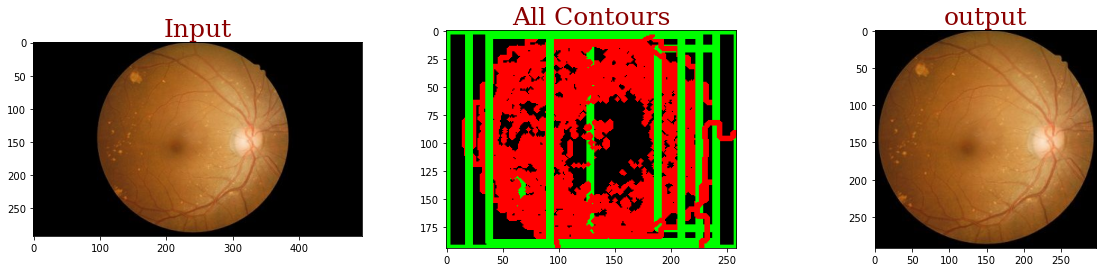

In [98]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1),plt.imshow(image),plt.title("Input",fontdict=font)
plt.subplot(1,3,2),plt.imshow(output),plt.title("All Contours",fontdict=font)
plt.subplot(1,3,3),plt.imshow(foreground),plt.title("output",fontdict=font)
print(foreground.shape)
plt.show()